In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os

In [2]:
# Get the current working directory
current_dir = os.getcwd()
file_name = "aggregate_dataframe.csv"
# Construct the full file path
file_path = os.path.join(current_dir, file_name)
# Read CSV into DataFrame
df = pd.read_csv(file_path)

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Resource Name', 'Resource Unit Code', 'Fuel Type',
       'Outage Type', 'Available MW Maximum', 'Available MW During Outage',
       'Effective MW Reduction Due to Outage', 'Actual Outage Start',
       'Nature Of Work'],
      dtype='object')


In [4]:
df['Actual Outage Start'] = pd.to_datetime(df['Actual Outage Start'])

In [5]:
unique_nature_of_work = df['Nature Of Work'].unique()
print(unique_nature_of_work)

['Tube Leak' 'Other' 'Turbine/Generator Vibration/Repair'
 'Fuel Problems/Repairs' 'Unknown' 'Exhaust Problems/Repairs'
 'Feedwater Problems/Repairs' 'Fuel Limitation/Lack of Fuel Availability'
 'Steam Turbine Limited/Unavailable Due to CT/GT Work'
 'Lack of Steam Load Availability' 'Inlet Air Problems/Repairs'
 'Emissions' 'Control system issues' 'Cooling Water Problems/Repairs'
 'Combustion Inspection and Repair' 'Overhaul' 'Boroscope'
 'Transformer Repair/Replace' 'Icing' 'Cold weather related'
 'Frozen Equipment' 'Temperature Limit' 'Hot weather related'
 'Human Error' 'Gas Company Pipeline Work' 'Frequency issue'
 'Black Start Test' 'Personnel Safety' 'Lightening' 'Fuel Switching']


In [6]:
unique_outage_type = df['Outage Type'].unique()
print(unique_outage_type)

['Maintenance Level 3' 'Maintenance Level 2' 'Maintenance Level 1'
 'Forced Extension' 'Forced' 'Unavoidable Extension']


In [7]:
ambient_temperature_factors = ['Icing', 'Cold weather related', 'Frozen Equipment', 'Hot weather related']
filtered_df = df[(df['Outage Type'].str.contains('Forced')) & (df['Nature Of Work'].isin(ambient_temperature_factors))]

In [8]:
print(filtered_df)

        Unnamed: 0 Resource Name Resource Unit Code Fuel Type Outage Type  \
12995        12995           PH1          PH1_UNIT1      Wind      Forced   
12996        12996           PH1          PH1_UNIT2      Wind      Forced   
12997        12997           PH2          PH2_UNIT1      Wind      Forced   
12998        12998           PH2          PH2_UNIT2      Wind      Forced   
13013        13013           PH1          PH1_UNIT1      Wind      Forced   
...            ...           ...                ...       ...         ...   
156952      156952         MLSES        MLSES_UNIT1   Lignite      Forced   
157488      157488         MLSES        MLSES_UNIT2   Lignite      Forced   
157700      157700         MLSES        MLSES_UNIT2   Lignite      Forced   
157898      157898         MLSES        MLSES_UNIT2   Lignite      Forced   
158081      158081         MLSES        MLSES_UNIT2   Lignite      Forced   

        Available MW Maximum  Available MW During Outage  \
12995          

In [9]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2865 entries, 12995 to 158081
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            2865 non-null   int64         
 1   Resource Name                         2865 non-null   object        
 2   Resource Unit Code                    2865 non-null   object        
 3   Fuel Type                             2865 non-null   object        
 4   Outage Type                           2865 non-null   object        
 5   Available MW Maximum                  2865 non-null   int64         
 6   Available MW During Outage            2865 non-null   float64       
 7   Effective MW Reduction Due to Outage  2865 non-null   float64       
 8   Actual Outage Start                   2865 non-null   datetime64[ns]
 9   Nature Of Work                        2865 non-null   object        
dtyp

In [10]:
# Extract the month from the 'Date' column and calculate the count for each month
grouped = filtered_df.groupby(filtered_df['Actual Outage Start'].dt.month)


# Print the count by month
print(grouped)

In [11]:
# Calculate the sum of 'Value' for each category
category_sum = grouped['Actual Outage Start'].count()
print(category_sum)


Actual Outage Start
1      543
2      237
3        3
6       59
7       45
8      331
12    1647
Name: Actual Outage Start, dtype: int64


In [12]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2865 entries, 12995 to 158081
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            2865 non-null   int64         
 1   Resource Name                         2865 non-null   object        
 2   Resource Unit Code                    2865 non-null   object        
 3   Fuel Type                             2865 non-null   object        
 4   Outage Type                           2865 non-null   object        
 5   Available MW Maximum                  2865 non-null   int64         
 6   Available MW During Outage            2865 non-null   float64       
 7   Effective MW Reduction Due to Outage  2865 non-null   float64       
 8   Actual Outage Start                   2865 non-null   datetime64[ns]
 9   Nature Of Work                        2865 non-null   object        
dtyp

In [13]:
filtered_df['Month'] = filtered_df['Actual Outage Start'].dt.month
filtered_df['Year'] = filtered_df['Actual Outage Start'].dt.year


<ipython-input-13-68252a08011d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Actual Outage Start'].dt.month
<ipython-input-13-68252a08011d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Actual Outage Start'].dt.year


In [14]:
# Create 'NewColumn' based on a condition

winter_months = [12,1,2]
spring_months = [3,4,5]
summer_months = [6,7,8]

# Define the conditions and corresponding values
conditions = [
    filtered_df['Month'].isin(winter_months),
    filtered_df['Month'].isin(spring_months),
    filtered_df['Month'].isin(summer_months)
]

values = ['Winter', 'Spring', 'Summer']

# Use numpy.select() to create the 'Category' column based on conditions
filtered_df['Season'] = np.select(conditions, values, default='Unknown')

# Print the DataFrame
print(filtered_df)

        Unnamed: 0 Resource Name Resource Unit Code Fuel Type Outage Type  \
12995        12995           PH1          PH1_UNIT1      Wind      Forced   
12996        12996           PH1          PH1_UNIT2      Wind      Forced   
12997        12997           PH2          PH2_UNIT1      Wind      Forced   
12998        12998           PH2          PH2_UNIT2      Wind      Forced   
13013        13013           PH1          PH1_UNIT1      Wind      Forced   
...            ...           ...                ...       ...         ...   
156952      156952         MLSES        MLSES_UNIT1   Lignite      Forced   
157488      157488         MLSES        MLSES_UNIT2   Lignite      Forced   
157700      157700         MLSES        MLSES_UNIT2   Lignite      Forced   
157898      157898         MLSES        MLSES_UNIT2   Lignite      Forced   
158081      158081         MLSES        MLSES_UNIT2   Lignite      Forced   

        Available MW Maximum  Available MW During Outage  \
12995          

<ipython-input-14-0e28befb2550>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Season'] = np.select(conditions, values, default='Unknown')


In [15]:
filtered_df

,Unnamed: 0,Resource Name,Resource Unit Code,Fuel Type,Outage Type,Available MW Maximum,Available MW During Outage,Effective MW Reduction Due to Outage,Actual Outage Start,Nature Of Work,Month,Year,Season
12995,12995,PH1,PH1_UNIT1,Wind,Forced,109,25.0,84.0,2022-12-21 00:10:00,Icing,12,2022,Winter
12996,12996,PH1,PH1_UNIT2,Wind,Forced,109,25.0,84.0,2022-12-21 00:10:00,Icing,12,2022,Winter
12997,12997,PH2,PH2_UNIT1,Wind,Forced,94,25.0,69.0,2022-12-21 00:10:00,Icing,12,2022,Winter
12998,12998,PH2,PH2_UNIT2,Wind,Forced,97,25.0,72.0,2022-12-21 00:10:00,Icing,12,2022,Winter
13013,13013,PH1,PH1_UNIT1,Wind,Forced,109,100.0,9.0,2022-12-21 08:43:00,Icing,12,2022,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156952,156952,MLSES,MLSES_UNIT1,Lignite,Forced,815,770.0,45.0,2023-08-31 20:45:00,Hot weather related,8,2023,Summer
157488,157488,MLSES,MLSES_UNIT2,Lignite,Forced,820,775.0,45.0,2023-08-08 08:14:00,Hot weather related,8,2023,Summer
157700,157700,MLSES,MLSES_UNIT2,Lignite,Forced,820,775.0,45.0,2023-08-08 08:14:00,Hot weather related,8,2023,Summer
157898,157898,MLSES,MLSES_UNIT2,Lignite,Forced,820,775.0,45.0,2023-08-08 08:14:00,Hot weather related,8,2023,Summer


In [17]:
# Group the DataFrame by the 'Category' column
grouped = filtered_df.groupby('Month')

# Calculate the sum of 'Value' for each group
count_values = grouped['Month'].count()


In [18]:
print(count_values)

Month
1      543
2      237
3        3
6       59
7       45
8      331
12    1647
Name: Month, dtype: int64


In [19]:
df_final = pd.DataFrame(data=count_values)
df_final = df_final.rename(columns={'Month': 'Count of Unplanned Outages'})
df_final['Month Number'] = df_final.index
df_final.reset_index(drop = True)
# Create 'NewColumn' based on a condition

winter_months = [12,1,2]
spring_months = [3,4,5]
summer_months = [6,7,8]

# Define the conditions and corresponding values
conditions = [
    df_final.index.isin(winter_months),
    df_final.index.isin(spring_months),
    df_final.index.isin(summer_months)
]

values = ['Winter', 'Spring', 'Summer']

# Use numpy.select() to create the 'Category' column based on conditions
df_final['Season'] = np.select(conditions, values, default='Unknown')

# Print the DataFrame
print(df_final)

       Count of Unplanned Outages  Month Number  Season
Month                                                  
1                             543             1  Winter
2                             237             2  Winter
3                               3             3  Spring
6                              59             6  Summer
7                              45             7  Summer
8                             331             8  Summer
12                           1647            12  Winter


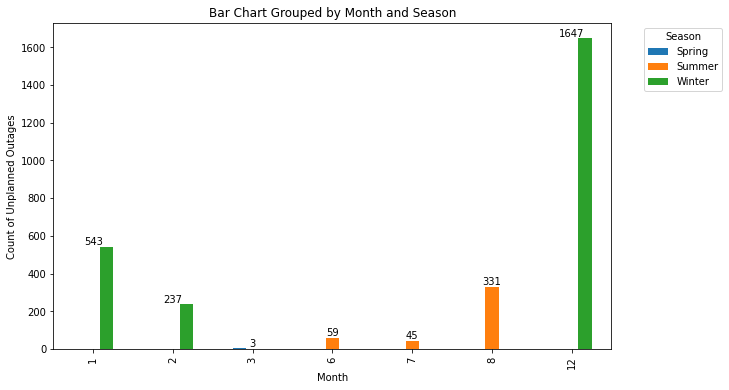

In [20]:
# Group the data by 'Month' and 'Season' and calculate the sum of 'Value'
grouped = df_final.groupby(['Month Number', 'Season'])['Count of Unplanned Outages'].sum().unstack()

# Create a bar chart
ax = grouped.plot(kind='bar', figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Count of Unplanned Outages')
ax.set_title('Bar Chart Grouped by Month and Season')

# Annotate each bar with its value
for index, value in enumerate(df_final['Count of Unplanned Outages']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Customize the legend
ax.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [21]:
from scipy.stats import f_oneway


# Perform the ANOVA test
anova_result = f_oneway(
    df_final[df_final['Season'] == 'Winter']['Count of Unplanned Outages'],
    df_final[df_final['Season'] == 'Spring']['Count of Unplanned Outages'],
    df_final[df_final['Season'] == 'Summer']['Count of Unplanned Outages']
)

# Print the ANOVA result
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Interpret the result
alpha = 0.05  # Set your significance level
if anova_result.pvalue < alpha:
    print("The p-value is less than", alpha)
    print("There is a significant difference in the means of at least two seasons.")
else:
    print("The p-value is greater than or equal to", alpha)
    print("There is no significant difference in the means of the seasons.")

ANOVA F-statistic: 1.482279493013965
ANOVA p-value: 0.3298623439689783
The p-value is greater than or equal to 0.05
There is no significant difference in the means of the seasons.


In [23]:
rand_nums = np.random.randint(low=1, high=100, size=10)
print(rand_nums)

[68 87 65 38 97 98 64 98 29 22]


In [86]:
"""
           Count of Unplanned Outages  Month Number  Season
Month                                                  
1                             543             1  Winter
2                             237             2  Winter
3                               3             3  Spring
6                              59             6  Summer
7                              45             7  Summer
8                             331             8  Summer
12                           1647            12  Winter

"""

# we are creating dummy data based off the real dat
# count of unplanned outages is used as the mean
# we use a standard deviation of 3 to get 99% of data from original data
# we create a sample size of 20 for each month



# Set the random seed for reproducibility
np.random.seed(0)

# Define the parameters
mean = 1647
std_dev = 3
sample_size = 30

# Generate random numbers with the specified mean and standard deviation
# each normal distribution is created based off the monthly count of forced unplanned outages caused weather related issues
# winter season
random_numbers_1 = np.random.normal(mean, std_dev, sample_size)
mean = 543
random_numbers_2 = np.random.normal(mean, std_dev, sample_size)
mean = 237
# spring season
random_numbers_3 = np.random.normal(mean, std_dev, sample_size)
# from the original data the was only 3 outages for one month of spring
# one month is not enough data
# thus we repeated use the same mean for all three months of spring
mean = 3
random_numbers_4 = np.random.normal(mean, std_dev, sample_size)
mean = 3
random_numbers_5 = np.random.normal(mean, std_dev, sample_size)
mean = 3
random_numbers_6 = np.random.normal(mean, std_dev, sample_size)
# summer season
mean = 59
random_numbers_7 = np.random.normal(mean, std_dev, sample_size)
mean = 45
random_numbers_8 = np.random.normal(mean, std_dev, sample_size)
mean = 331
random_numbers_9 = np.random.normal(mean, std_dev, sample_size)
winter_str = ['winter'] * sample_size
spring_str = ['spring'] * sample_size
summer_str = ['summer'] * sample_size
month_num_1 = [1] * sample_size
month_num_2 = [2] * sample_size
month_num_3 = [3] * sample_size
month_num_4 = [4] * sample_size
month_num_5 = [5] * sample_size
month_num_6 = [6] * sample_size
month_num_7 = [7] * sample_size
month_num_8 = [8] * sample_size
month_num_9 = [9] * sample_size
# Round the random numbers to integers
random_numbers_1 = list(np.round(random_numbers_1).astype(int))
random_numbers_2 = list(np.round(random_numbers_2).astype(int))
random_numbers_3 = list(np.round(random_numbers_3).astype(int))
random_numbers_4 = list(np.round(random_numbers_4).astype(int))
# round and take abs value for spring season because our mean used to created these values is so small: 3
random_numbers_4 = list(np.abs(random_numbers_4).astype(int))
random_numbers_5 = list(np.round(random_numbers_5).astype(int))
random_numbers_5 = list(np.abs(random_numbers_5).astype(int))
random_numbers_6 = list(np.round(random_numbers_6).astype(int))
random_numbers_6 = list(np.abs(random_numbers_6).astype(int))
random_numbers_7 = list(np.round(random_numbers_7).astype(int))
random_numbers_8 = list(np.round(random_numbers_8).astype(int))
random_numbers_9 = list(np.round(random_numbers_9).astype(int))



count_unplanned_outages = [random_numbers_1, 
                           random_numbers_2,
                           random_numbers_3, 
                           random_numbers_4,
                           random_numbers_5,
                           random_numbers_6, 
                           random_numbers_7, 
                           random_numbers_8, 
                           random_numbers_9]
months =  [month_num_1,
           month_num_2,
           month_num_3,
           month_num_4, 
           month_num_5,
           month_num_6,
           month_num_7,
           month_num_8,
           month_num_9]
seasons = [winter_str,
           winter_str,
           winter_str,
           spring_str, 
           spring_str, 
           spring_str, 
           summer_str,
           summer_str,
           summer_str]
# concatenate months so we can have one enter data seamlessly into dataframe
concatenated_list_count_unplanned_outages = [] 
for i in count_unplanned_outages:
    concatenated_list_count_unplanned_outages += i

concatenated_list_months = []
for i in months:
    concatenated_list_months += i

conctenated_list_season = []
for i in seasons:
    conctenated_list_season += i



In [87]:
print(len(count_unplanned_outages))
print(len(months))
print(len(seasons))

print(len(concatenated_list_count_unplanned_outages))
print(len(concatenated_list_months))
print(len(conctenated_list_season))

9
9
9
270
270
270


In [88]:
# construct dict with dummy data
d = {
    'Count of Unplanned Outages': concatenated_list_count_unplanned_outages,
    'Month': concatenated_list_months,
    'Season': conctenated_list_season
}
# loads data
final_df = pd.DataFrame(d)

In [89]:
# validate dummy data
final_df

,Count of Unplanned Outages,Month,Season
0,1652,1,winter
1,1648,1,winter
2,1650,1,winter
3,1654,1,winter
4,1653,1,winter
...,...,...,...
265,332,9,summer
266,333,9,summer
267,331,9,summer
268,330,9,summer


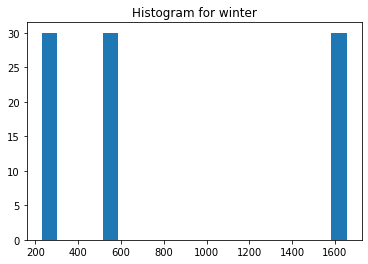

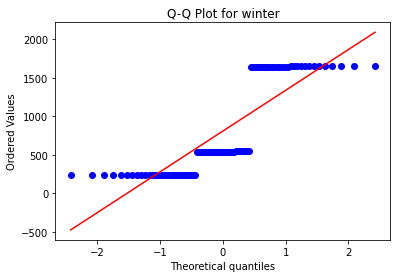

Shapiro-Wilk p-value for winter: 8.052561221993937e-12


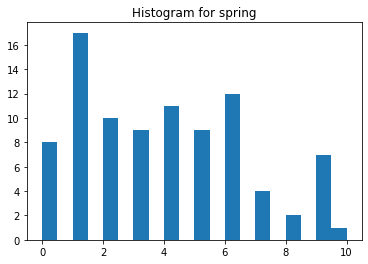

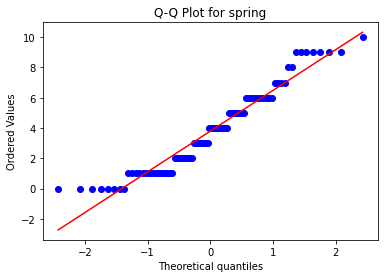

Shapiro-Wilk p-value for spring: 0.0002052501222351566


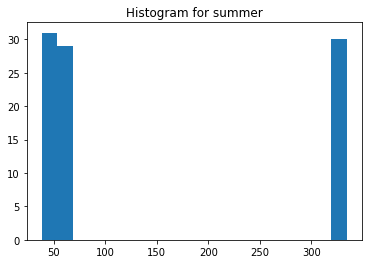

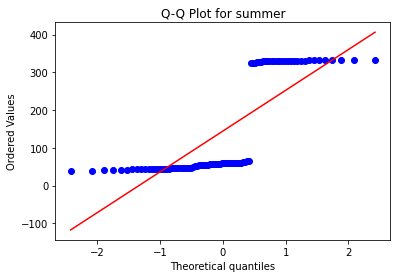

Shapiro-Wilk p-value for summer: 1.3303102380530368e-13


In [93]:

from scipy import stats

# Assuming your data is in a DataFrame called 'df'

# List of unique seasons in the data
seasons = final_df['Season'].unique()

# Loop through each season and test normality
for season in seasons:
    season_data = final_df[final_df['Season'] == season]['Count of Unplanned Outages']
    
    # Histogram
    plt.hist(season_data, bins=20)
    plt.title(f'Histogram for {season}')
    plt.show()

    # Q-Q Plot
    stats.probplot(season_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {season}')
    plt.show()

    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(season_data)
    print(f"Shapiro-Wilk p-value for {season}: {shapiro_test[1]}")


In [94]:
# Perform ANOVA test by season
seasons = final_df['Season'].unique()
anova_results = {}

for season in seasons:
    sample_data = final_df[final_df['Season'] == season]['Count of Unplanned Outages']
    anova_results[season] = sample_data

# Perform ANOVA test
f_statistic, p_value = f_oneway(*anova_results.values())

# Print ANOVA results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test result is statistically significant, indicating at least one group differs.")
else:
    print("The ANOVA test result is not statistically significant, indicating no significant difference between groups.")

F-statistic: 128.2264635623691
P-value: 9.312996214460633e-40
The ANOVA test result is statistically significant, indicating at least one group differs.


Because we have a statisitcally significant difference of variance we cannot use ANOVA

In [95]:

# Assuming your data is in a DataFrame called 'df'

# Create a list to store data for each season
season_data = []

# List of unique seasons in the data
seasons = final_df['Season'].unique()

# Extract and store data for each season
for season in seasons:
    season_data.append(final_df[final_df['Season'] == season]['Count of Unplanned Outages'])

# Perform Levene's test for homogeneity of variances
levene_test = stats.levene(*season_data)

# Alternatively, you can use Bartlett's test:
# bartlett_test = stats.bartlett(*season_data)

# Print the test result
print("Levene's test p-value:", levene_test.pvalue)

# Interpret the result
alpha = 0.05  # Set your significance level
if levene_test.pvalue < alpha:
    print("The variances are significantly different among seasons.")
else:
    print("The variances are not significantly different among seasons.")


Levene's test p-value: 2.1471339309922397e-25
The variances are significantly different among seasons.


In [103]:
import pingouin as pg 
# Assuming your data is in a DataFrame called 'df' and the 'Season' column represents the groups

# Create a dictionary to store data for each season
season_data = {}

# List of unique seasons in the data
seasons = final_df['Season'].unique()

# Extract and store data for each season
for season in seasons:
    season_data[season] = final_df[final_df['Season'] == season]['Count of Unplanned Outages']

# Perform Welch's ANOVA test
welch_anova_test = pg.welch_anova(dv='Count of Unplanned Outages', between='Season', data=final_df) 

# Print the test result
print("Welch's ANOVA:")
print(welch_anova_test)

# Interpret the result
alpha = 0.05  # Set your significance level
# if welch_anova_test.pvalue < alpha:
#     print("There are significant differences in means among seasons.")
# else:
#     print("There are no significant differences in means among seasons.")


Welch's ANOVA:
   Source  ddof1       ddof2          F         p-unc       np2
0  Season      2  118.719623  128.70945  1.866828e-30  0.489925
